In [3]:
import requests
import json

lat = "42.4154" # enter coordinates for desired location
lon = "-71.1565"
genius= requests.get(f"https://api.weather.gov/points/{lat},{lon}") #call those coords to the site

json_file = genius.json()
json_file # read json file

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   's': 'https://schema.org/',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#',
   'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'},
   'city': 's:addressLocality',
   'state': 's:addressRegion',
   'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'},
   'bearing': {'@type': 's:QuantitativeValue'},
   'value': {'@id': 's:value'},
   'unitCode': {'@id': 's:unitCode', '@type': '@id'},
   'forecastOffice': {'@type': '@id'},
   'forecastGridData': {'@type': '@id'},
   'publicZone': {'@type': '@id'},
   'county': {'@type': '@id'}}],
 'id': 'https://api.weather.gov/points/42.4154,-71.1565',
 'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-71.1565, 42.4154]},
 'properties': {'@id': 'https://api.weather.gov/p

In [6]:
forecast = json_file['properties']['forecast']
# isolate url
new_request = requests.get(forecast) # request imported - part of API

json = new_request.json() # opening url and displaying data
json

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#'}],
 'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-71.1248323, 42.4464212],
    [-71.1299906, 42.425025100000006],
    [-71.1010054, 42.42121610000001],
    [-71.0958411, 42.44261190000001],
    [-71.1248323, 42.4464212]]]},
 'properties': {'updated': '2023-03-14T19:57:31+00:00',
  'units': 'us',
  'forecastGenerator': 'BaselineForecastGenerator',
  'generatedAt': '2023-03-14T23:19:07+00:00',
  'updateTime': '2023-03-14T19:57:31+00:00',
  'validTimes': '2023-03-14T13:00:00+00:00/P8DT6H',
  'elevation': {'unitCode': 'wmoUnit:m', 'value': 45.1104},
  'periods': [{'number': 1,
    'name': 'Tonight',
    'startTime': '2023-03-14T19:00:00-04:00',
    'endTime': '2023-03-15T06:00:00-0

In [7]:
daily = json['properties']['periods'] # locate url

for i in daily: # iterate through the url to find specified details below
    name = i['name']
    temp = i['temperature']
    detail = i['detailedForecast']
    print(name)
    print(temp)
    print(detail)

Tonight
32
Snow. Cloudy, with a low around 32. Northwest wind 18 to 26 mph, with gusts as high as 56 mph. Chance of precipitation is 100%. New snow accumulation of 2 to 4 inches possible.
Wednesday
41
A slight chance of snow showers before 7am. Mostly cloudy, with a high near 41. Northwest wind 17 to 21 mph, with gusts as high as 35 mph. Chance of precipitation is 20%.
Wednesday Night
31
Mostly clear, with a low around 31. Northwest wind 13 to 20 mph, with gusts as high as 33 mph.
Thursday
47
Mostly sunny, with a high near 47. West wind around 12 mph.
Thursday Night
36
Mostly cloudy, with a low around 36. West wind 6 to 10 mph.
Friday
47
A chance of rain after 8am. Cloudy, with a high near 47. South wind 5 to 10 mph. Chance of precipitation is 40%.
Friday Night
40
Rain likely before midnight, then rain showers likely. Cloudy, with a low around 40. Southwest wind around 12 mph. Chance of precipitation is 60%.
Saturday
50
A chance of rain showers before 5pm. Mostly cloudy, with a high ne

In [15]:
import csv
weather_file = open("weather_file.csv", "w", newline="", encoding="utf-8")
csv_writer = csv.writer(weather_file) 
csv_writer.writerow(["Name","Temperature","Details"])


for i in daily:
    if i == daily[0]:
        pass
    else:
        name = i['name']
        temp = i['temperature']
        detail = i['detailedForecast']
        
        csv_writer.writerow([name, temp, detail])
    
weather_file.close()

In [6]:
import pandas as pd

In [7]:
sheet = pd.read_csv("weather_file.csv")
sheet

,Name,Temperature,Details
0,Wednesday,41,A slight chance of snow showers before 7am. Mo...
1,Wednesday Night,31,"Mostly clear, with a low around 31. Northwest ..."
2,Thursday,47,"Mostly sunny, with a high near 47. West wind a..."
3,Thursday Night,36,"Mostly cloudy, with a low around 36. West wind..."
4,Friday,47,"A chance of rain after 8am. Cloudy, with a hig..."
5,Friday Night,40,"Rain likely before midnight, then rain showers..."
6,Saturday,50,A chance of rain showers before 5pm. Mostly cl...
7,Saturday Night,28,"Partly cloudy, with a low around 28. West wind..."
8,Sunday,39,"Mostly sunny, with a high near 39. West wind 1..."
9,Sunday Night,27,"Mostly clear, with a low around 27. West wind ..."


In [8]:
from matplotlib import pyplot as plt
import numpy as np

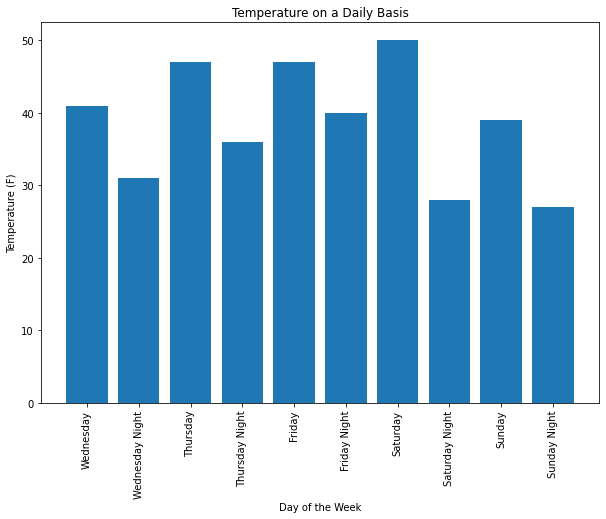

In [9]:
df = pd.DataFrame(sheet) 

name  = df['Name']
temp = df['Temperature']

fig = plt.figure(figsize=(10,7))
plt.bar(name[0:10], temp[0:10])

plt.xlabel("Day of the Week")
plt.ylabel("Temperature (F)")
plt.title("Temperature on a Daily Basis")
plt.xticks(rotation=90)


plt.show()

## Bonus:


## plt.xticks(rotation=90)
### - the code added to rotate the x-axis titles so they do not crowd each other
### - can be done at different angles

# Source Used:
## https://stackoverflow.com/questions/32244019/how-to-rotate-x-axis-tick-labels-in-a-pandas-plot 